<a href="https://colab.research.google.com/github/MFerrugem/RNA/blob/main/Mapa_de_caracteristicas_VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Visualize Filters and Feature Maps in Convolutional Neural Networks, baseado no código em https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/


In [14]:
# TensorFlow 2.x - Carregar modelo VGG
from tensorflow.keras.applications import VGG16
from tensorflow.keras import Model

# Carregar o modelo
model = VGG16(weights='imagenet')

# Resumo do modelo
model.summary()


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# summarize filter shapes
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as pyplot

# load the model
model = VGG16(weights='imagenet')

# summarize filter shapes
for layer in model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

# Visualizar alguns filtros (exemplo adicional)
def visualize_filters(layer_name, num_filters=8):
    """
    Visualizar filtros de uma camada específica
    """
    for layer in model.layers:
        if layer.name == layer_name:
            filters, biases = layer.get_weights()
            # Normalizar os filtros para visualização
            f_min, f_max = filters.min(), filters.max()
            filters = (filters - f_min) / (f_max - f_min)

            # Plotar os primeiros filtros
            fig, axes = pyplot.subplots(1, num_filters, figsize=(15, 3))
            for i in range(num_filters):
                ax = axes[i]
                # Pegar o primeiro filtro do canal de entrada
                ax.imshow(filters[:, :, 0, i], cmap='viridis')
                ax.set_title(f'Filter {i+1}')
                ax.axis('off')
            pyplot.suptitle(f'Filtros da camada: {layer_name}')
            pyplot.show()
            break

# Exemplo de uso - visualizar filtros da primeira camada convolucional
# visualize_filters('block1_conv1', 8)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


In [16]:
# retrieve weights from the second hidden layer
filters, biases = model.layers[1].get_weights()

# Print the shapes and basic statistics
print(f"Layer name: {model.layers[1].name}")
print(f"Filters shape: {filters.shape}")
print(f"Biases shape: {biases.shape}")
print(f"Filters - Min: {filters.min():.4f}, Max: {filters.max():.4f}, Mean: {filters.mean():.4f}")
print(f"Biases - Min: {biases.min():.4f}, Max: {biases.max():.4f}, Mean: {biases.mean():.4f}")

Layer name: block1_conv1
Filters shape: (3, 3, 3, 64)
Biases shape: (64,)
Filters - Min: -0.6714, Max: 0.6085, Mean: -0.0024
Biases - Min: -0.0158, Max: 2.0640, Mean: 0.5014


In [17]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

print(f"Normalized filters - Min: {filters.min():.6f}, Max: {filters.max():.6f}")

Normalized filters - Min: 0.000000, Max: 1.000000


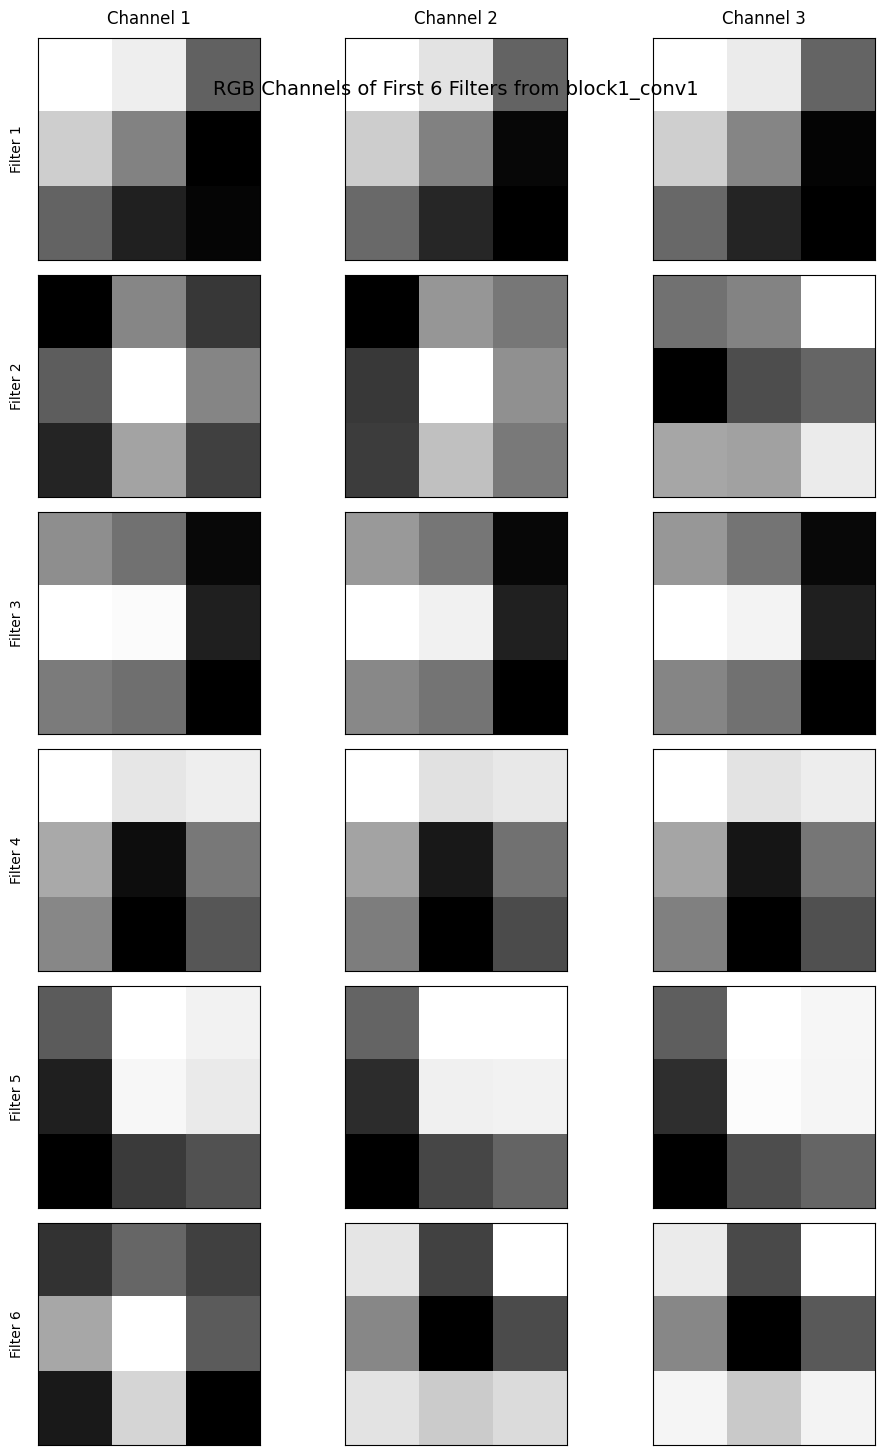

In [18]:
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
import numpy as np

# Load the model
model = VGG16(weights='imagenet')

# Retrieve weights from the first convolutional layer
filters, biases = model.layers[1].get_weights()

# Normalize filter values to 0-1 for visualization
f_min, f_max = filters.min(), filters.max()
filters_normalized = (filters - f_min) / (f_max - f_min)

# Plot first few filters
n_filters, ix = 6, 1
plt.figure(figsize=(10, 15))

for i in range(n_filters):
    # get the filter
    f = filters_normalized[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn off axis
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(f[:, :, j], cmap='gray')

        # Add labels for first row and first column
        if i == 0:
            plt.title(f'Channel {j+1}', pad=10)
        if j == 0:
            ax.set_ylabel(f'Filter {i+1}', rotation=90, labelpad=10)

        ix += 1

plt.suptitle(f'RGB Channels of First {n_filters} Filters from {model.layers[1].name}',
             fontsize=14, y=0.92)
plt.tight_layout()
plt.show()

In [19]:
# summarize feature map size for each conv layer
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt

# load the model
model = VGG16(weights='imagenet')

# summarize feature map shapes
print("Feature Map Sizes for Convolutional Layers:")
print("=" * 60)
for i in range(len(model.layers)):
    layer = model.layers[i]
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # summarize output shape
    print(f"{i:2d} {layer.name:15} {layer.output.shape}")

Feature Map Sizes for Convolutional Layers:
 1 block1_conv1    (None, 224, 224, 64)
 2 block1_conv2    (None, 224, 224, 64)
 4 block2_conv1    (None, 112, 112, 128)
 5 block2_conv2    (None, 112, 112, 128)
 7 block3_conv1    (None, 56, 56, 256)
 8 block3_conv2    (None, 56, 56, 256)
 9 block3_conv3    (None, 56, 56, 256)
11 block4_conv1    (None, 28, 28, 512)
12 block4_conv2    (None, 28, 28, 512)
13 block4_conv3    (None, 28, 28, 512)
15 block5_conv1    (None, 14, 14, 512)
16 block5_conv2    (None, 14, 14, 512)
17 block5_conv3    (None, 14, 14, 512)


In [20]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Load the original VGG16 model
base_model = VGG16(weights='imagenet')

# redefine model to output right after the first hidden layer
model = Model(inputs=base_model.inputs, outputs=base_model.layers[1].output)

# load the image with the required shape
img = load_img('bird.jpg', target_size=(224, 224))
# https://machinelearningmastery.com/wp-content/uploads/2019/02/bird.jpg
# Print model summary
print("Feature extraction model summary:")
print(f"Input shape: {model.input_shape}")
print(f"Output shape: {model.output_shape}")
print(f"Layer used: {base_model.layers[1].name}")

Feature extraction model summary:
Input shape: (None, 224, 224, 3)
Output shape: (None, 224, 224, 64)
Layer used: block1_conv1


In [21]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications.vgg16 import preprocess_input

# Assuming 'img' is already loaded from previous code
# If not, load the image first:
# img = load_img('bird.jpg', target_size=(224, 224))

# convert the image to an array
img_array = img_to_array(img)

# expand dimensions so that it represents a single 'sample'
img_array = np.expand_dims(img_array, axis=0)

# prepare the image (e.g. scale pixel values for the vgg)
img_array = preprocess_input(img_array)

print(f"Image array shape: {img_array.shape}")
print(f"Image array range: [{img_array.min():.3f}, {img_array.max():.3f}]")

Image array shape: (1, 224, 224, 3)
Image array range: [-123.680, 151.061]


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,792 (7.00 KB)

 Trainable params: 1,792 (7.00 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


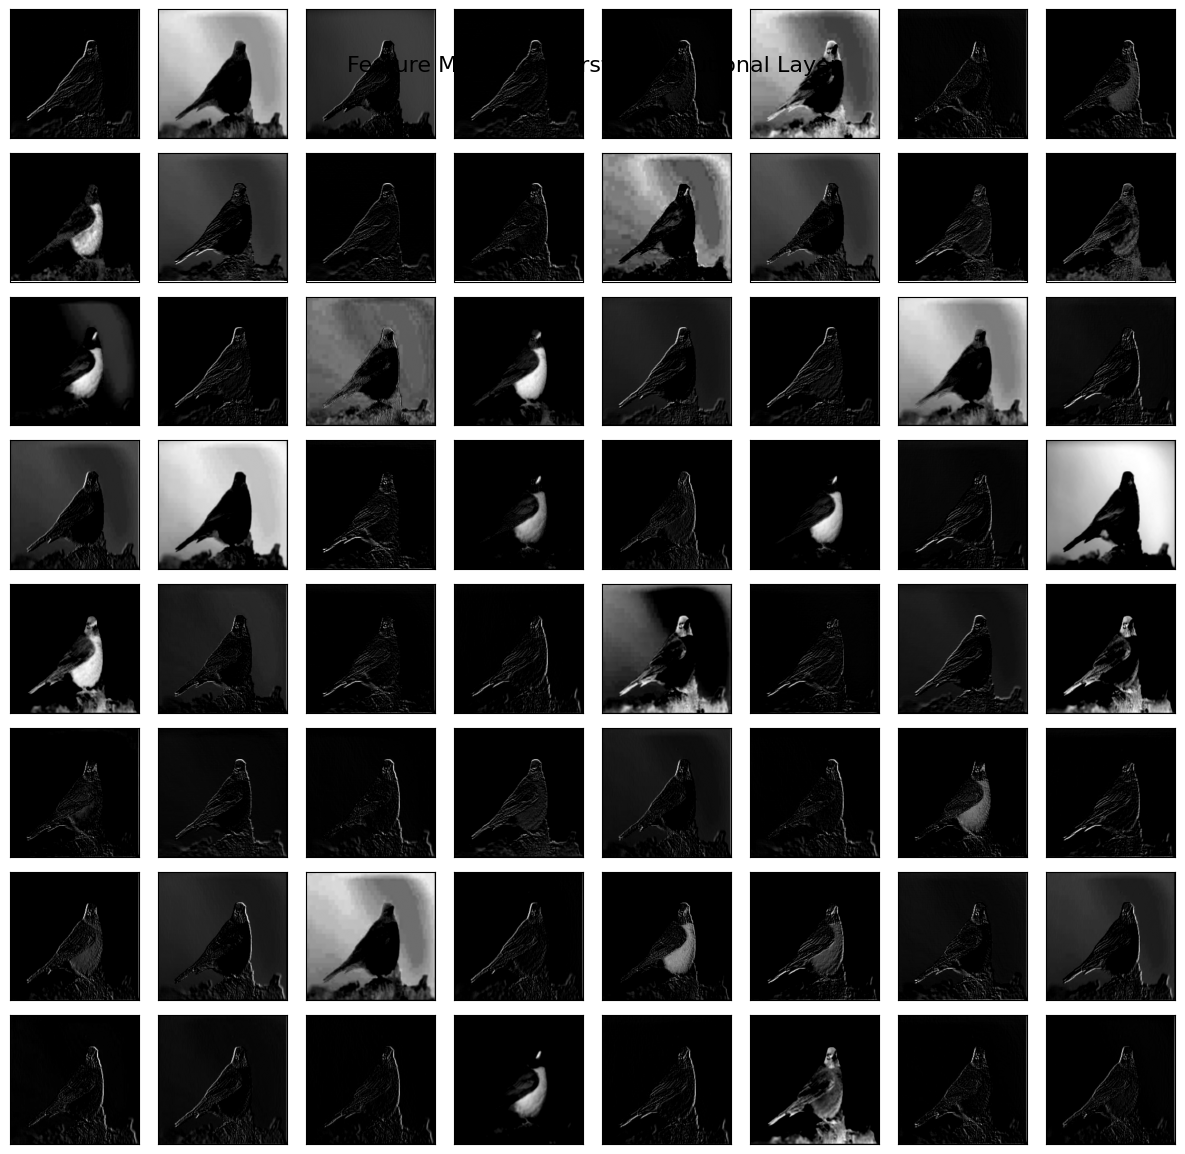

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input

model.summary()

# get feature map for first hidden layer
feature_maps = model.predict(img_array)

# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
plt.figure(figsize=(12, 12))
for _ in range(square):
    for _ in range(square):
        # specify subplot and turn off axis
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
# show the figure
plt.suptitle('Feature Maps from First Convolutional Layer', fontsize=16, y=0.92)
plt.tight_layout()
plt.show()

Código completo

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step


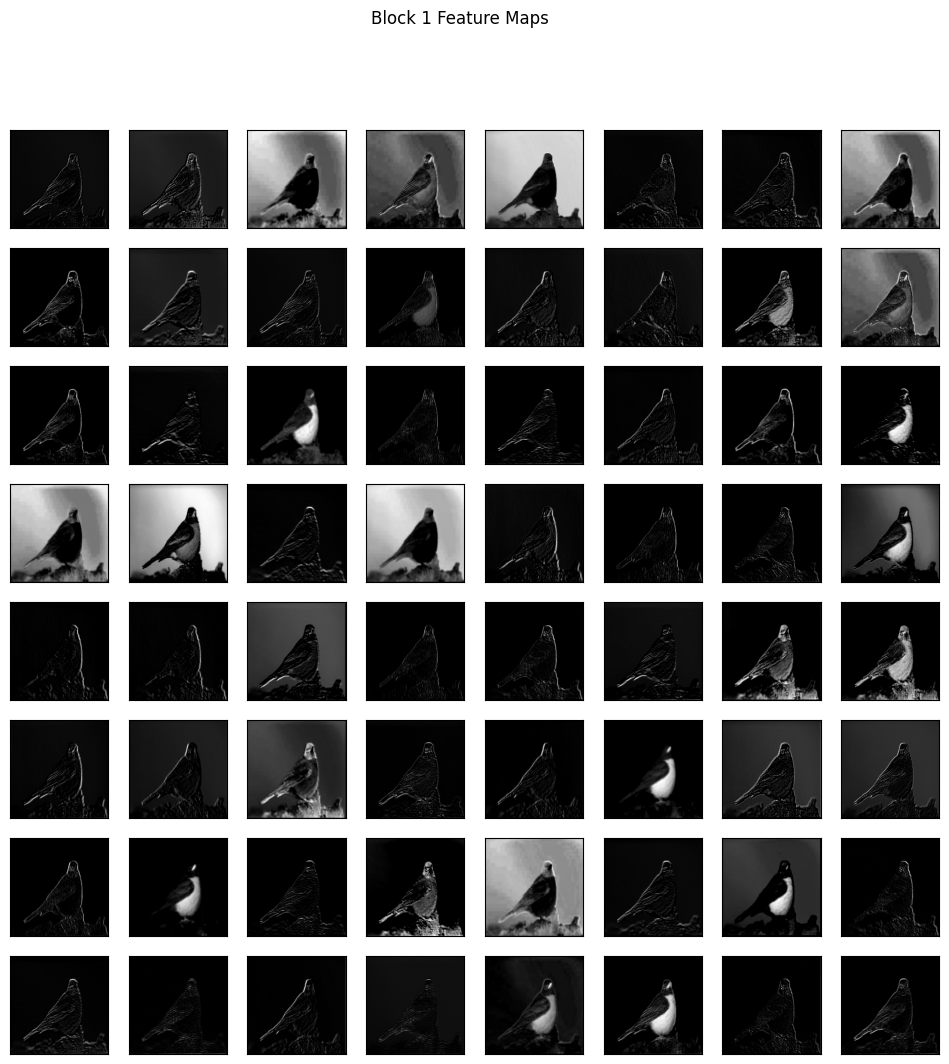

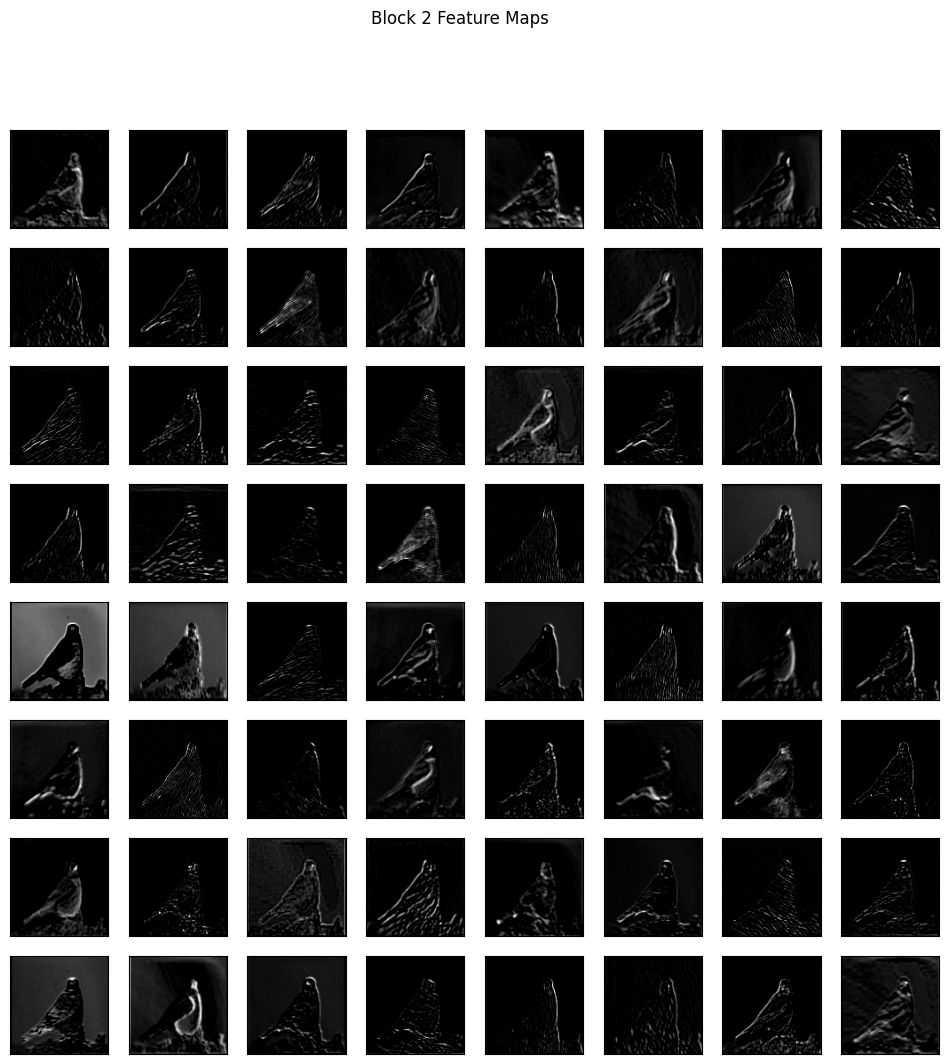

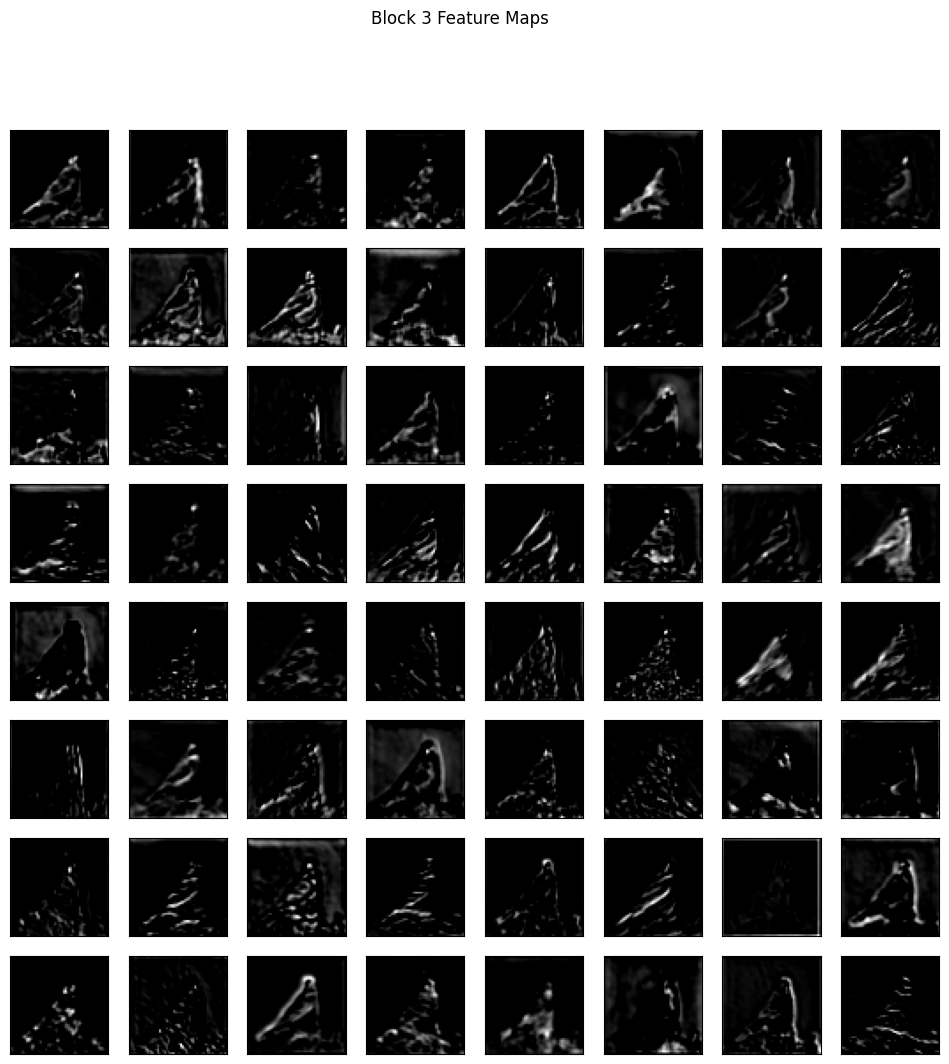

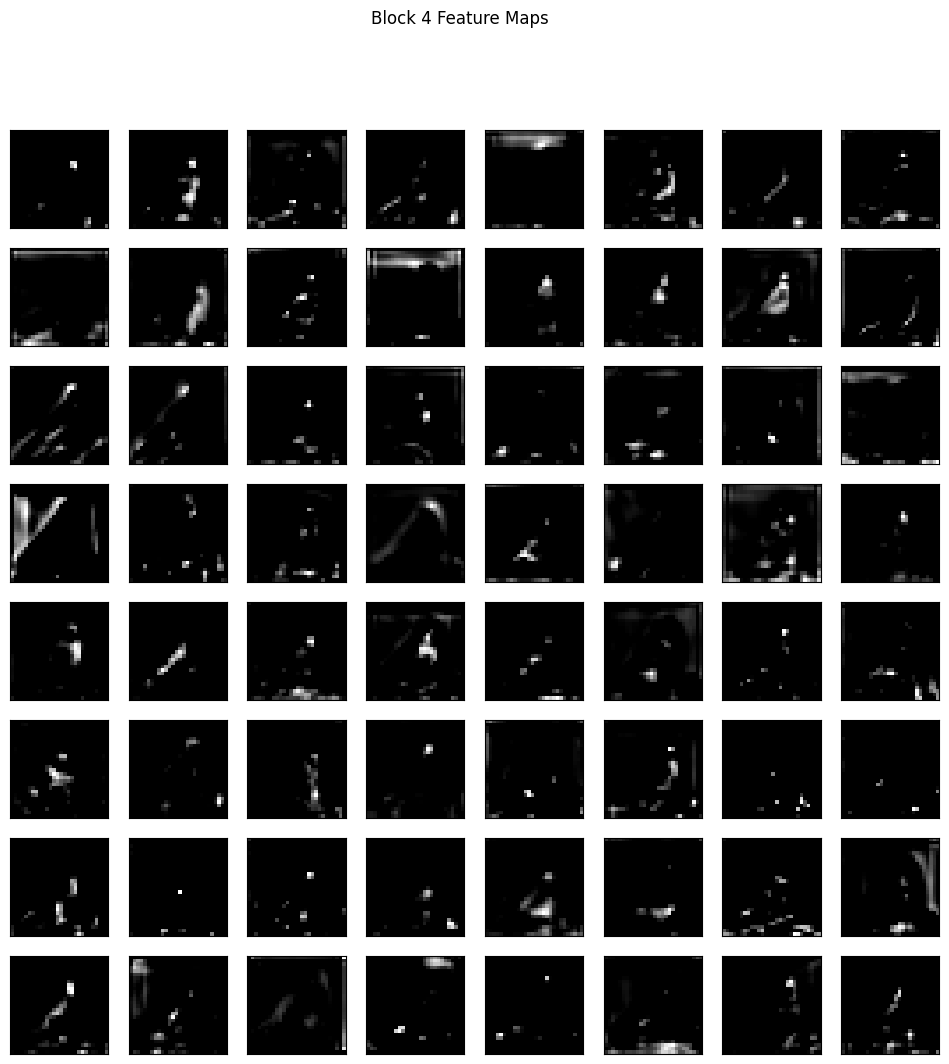

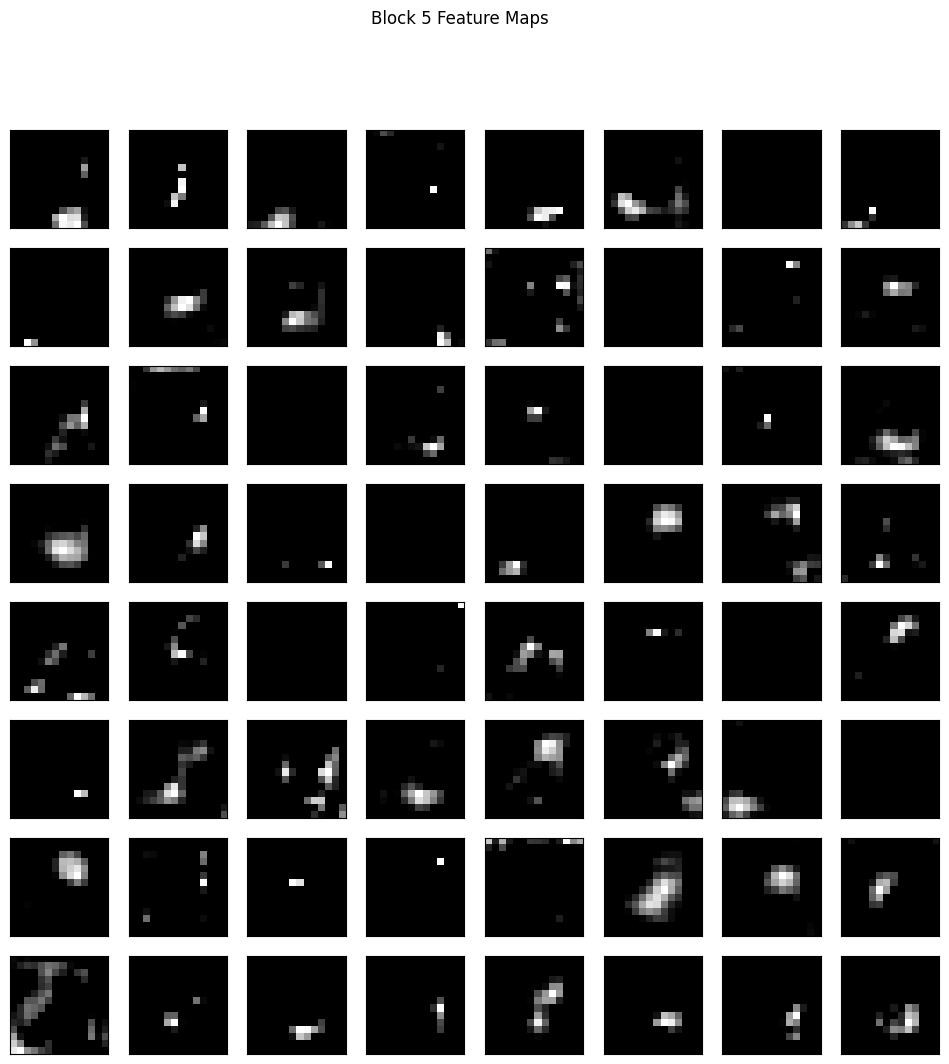

In [23]:
# visualize feature maps output from each block in the vgg model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
img = load_img('bird.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block
square = 8
for i, fmap in enumerate(feature_maps):
	# plot all 64 maps in an 8x8 squares
	ix = 1
	pyplot.figure(figsize=(12, 12))
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	# show the figure
	pyplot.suptitle(f'Block {i+1} Feature Maps')
	pyplot.show()